# Load datasets

In [ ]:
import torch
import numpy as np
import tqdm
import matplotlib.pyplot as plt

import FSHA_torch
# import architectures_torch as architectures
import datasets_torch
from datasets_torch import *

xpriv, xpub = load_cifar()
print(xpriv)

# n = 15
# x_priv = datasets_torch.getImagesDS(xpriv, n)
# x_pub = datasets_torch.getImagesDS(xpub, n)

# x_priv = x_priv.reshape(-1, 32, 32, 3)
# x_pub = x_priv.reshape(-1, 32, 32, 3)

# datasets_torch.plot(x_priv)
# datasets_torch.plot(x_pub)

# Setup attack:

In [ ]:
# print(xpriv[0][0].shape)
# xx = xpriv[0][0]

In [ ]:
# import architectures_torch as architectures
# make_f, tilde_f, decoder, D = architectures.SETUPS[2]
# f = make_f(input_shape= xx.shape)
# tilde_f = tilde_f(input_shape= xx.shape)
# print(tilde_f)

In [ ]:
# dataset = torch.utils.data.DataLoader(xpriv, batch_size=32, shuffle=True)
# data_iter = iter(dataset)   
# x, y = next(data_iter)
# print(x.shape)
# f_output = f(x)
# print(f_output)
# print(f_output.shape)

In [ ]:
batch_size = 64
id_setup = 1
hparams = {
    'WGAN' : True,
    'gradient_penalty' : 600.,
    'style_loss' : None,
    'lr_f' :  0.00001,
    'lr_tilde' : 0.00001,
    'lr_D' : 0.0001,
}

fsha = FSHA_torch.FSHA(xpriv, xpub, id_setup-1, batch_size, hparams)

torch.Size([64, 16, 16])
[DECODER] activation:  None


# Run attack:

In [ ]:
log_frequency = 500
LOG = fsha(30000, verbose=True, progress_bar=False, log_frequency=log_frequency)

RUNNING...


  0%|          | 2/30000 [00:01<4:12:20,  1.98it/s]

log--00%-0000000] validation: 0.3392
f_Loss: 0.190687894821167
f_tilde_loss: 0.38719356060028076
D_loss: 49.137718200683594



  2%|▏         | 501/30000 [01:49<1:47:02,  4.59it/s]

log--01%-0000500] validation: 0.4117
f_Loss: 11.29654598236084
f_tilde_loss: 0.02289397083222866
D_loss: -45.5971794128418



  3%|▎         | 1001/30000 [03:38<1:43:20,  4.68it/s]

log--03%-0001000] validation: 0.7704
f_Loss: 8.678985595703125
f_tilde_loss: 0.016342682763934135
D_loss: -37.148231506347656



  5%|▌         | 1502/30000 [05:25<1:26:50,  5.47it/s]

log--05%-0001500] validation: 0.7889
f_Loss: 6.097167015075684
f_tilde_loss: 0.015296151861548424
D_loss: -34.058349609375



  7%|▋         | 2001/30000 [07:09<1:43:05,  4.53it/s]

log--06%-0002000] validation: 0.8297
f_Loss: 0.38158249855041504
f_tilde_loss: 0.012625133618712425
D_loss: -32.33384323120117



  8%|▊         | 2501/30000 [08:55<1:45:44,  4.33it/s]

log--08%-0002500] validation: 0.8477
f_Loss: -2.7060747146606445
f_tilde_loss: 0.011243472807109356
D_loss: -30.716081619262695



 10%|█         | 3001/30000 [10:42<1:40:49,  4.46it/s]

log--10%-0003000] validation: 0.8550
f_Loss: 1.9336037635803223
f_tilde_loss: 0.009401366114616394
D_loss: -29.17926025390625



 10%|█         | 3103/30000 [11:04<1:35:59,  4.67it/s]


KeyboardInterrupt: 

# Plot logs:

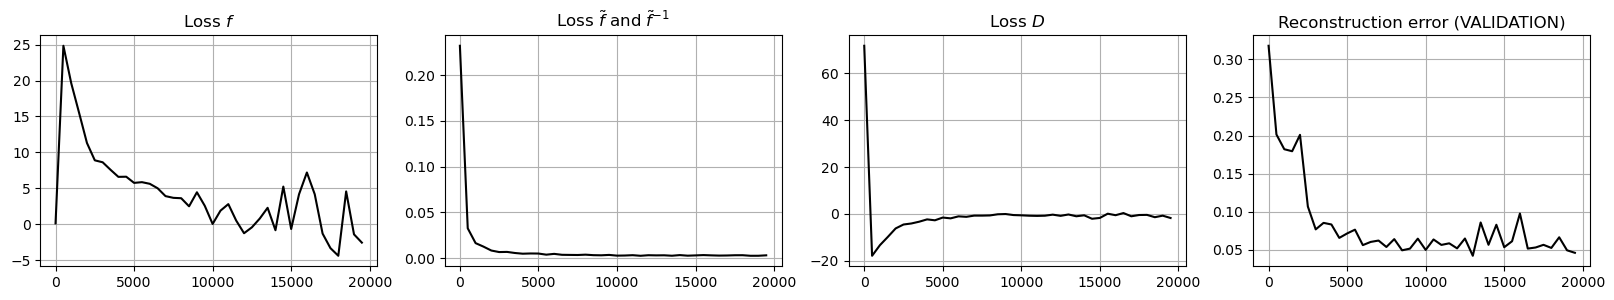

In [ ]:
def plot_log(ax, x, y, label):
    ax.plot(x, y, color='black')
    ax.set(title=label)
    ax.grid()

n = 4
fix, ax = plt.subplots(1, n, figsize=(n*5, 3))
x = np.arange(0, len(LOG)) * log_frequency 

plot_log(ax[0], x, LOG[:, 0], label='Loss $f$')
plot_log(ax[1], x, LOG[:, 1],  label='Loss $\\tilde{f}$ and $\\tilde{f}^{-1}$')
plot_log(ax[2], x, LOG[:, 2],  label='Loss $D$')
plot_log(ax[3], x, LOG[:, 3],  label='Reconstruction error (VALIDATION)')

# Plot reconstruction private data:

In [ ]:
n = 20
X = torch.from_numpy(getImagesDS(xpriv, n)).cuda()
X_recovered, control = fsha.attack(X)

X = X.detach().cpu().permute(0,2,3,1).numpy()
X_recovered = X_recovered.detach().cpu().permute(0,2,3,1).numpy()
control = control.detach().cpu().permute(0,2,3,1).numpy()

def plot(X):
    n = len(X)
    X = (X+1)/2
    fig, ax = plt.subplots(1, n, figsize=(n*3,3))
    plt.axis('off')
    plt.subplots_adjust(wspace=0, hspace=-.05)
    for i in range(n):
        ax[i].imshow((X[i]), cmap='inferno')
        # 使用高对比度的色图 'inferno' 可以突出图像的细节。
        ax[i].set(xticks=[], yticks=[])
        ax[i].set_aspect('equal')
        
    return fig


fig = plot(X)
fig = plot(X_recovered)
fig = plot(control)

NameError: name 'torch' is not defined